In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

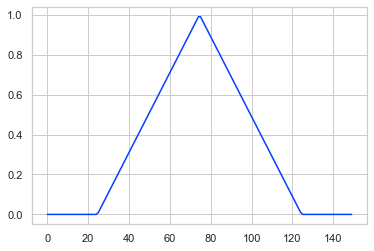

In [2]:
t = np.arange(0,150)
s = np.zeros(150)
s[25:125] = signal.triang(100)
plt.plot(t, s)

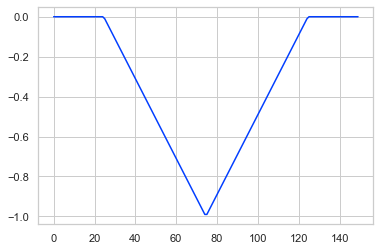

In [3]:
s2 = -s
plt.plot(t, s2)

In [4]:
from scipy.stats import wasserstein_distance

In [5]:
wasserstein_distance(s,s2)

0.6666666666666667

In [6]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_2 = pd.DataFrame(zip(t,s2),columns=['Time','Value'])

In [7]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [8]:
jaccard(signal_1,signal_2)

0.20634920634920634

# FFT - Real and Imag

In [9]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

<StemContainer object of 3 artists>

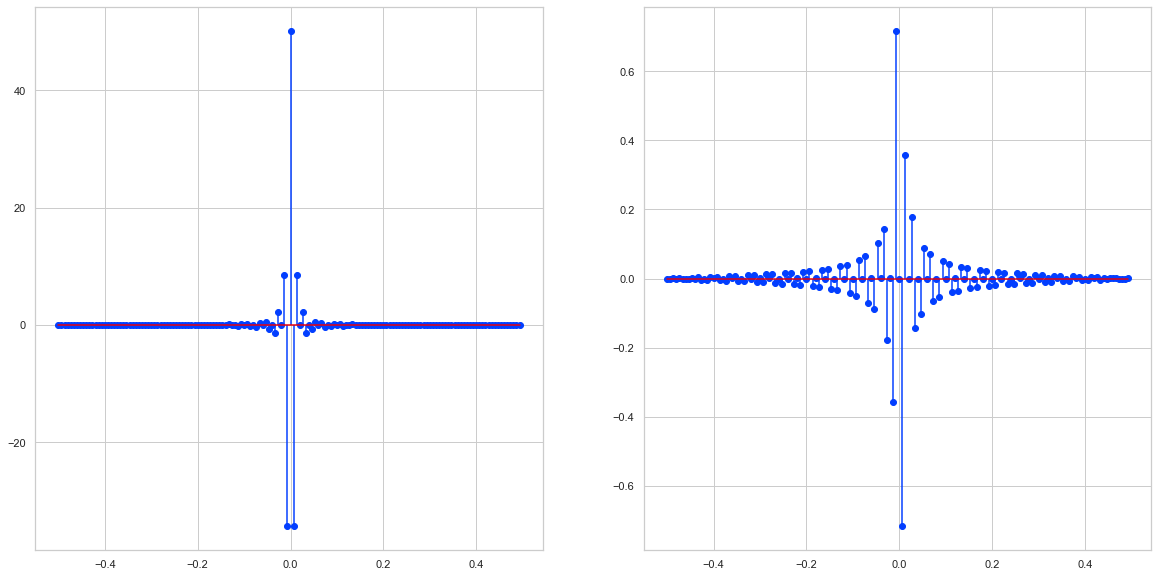

In [35]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])

<StemContainer object of 3 artists>

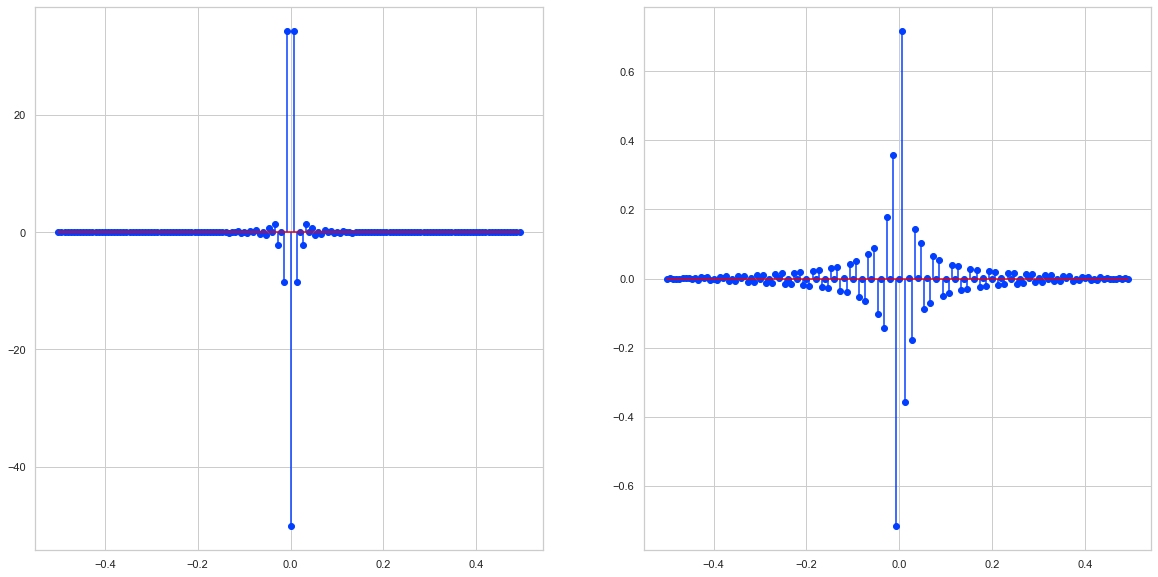

In [36]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [12]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  0.6895200907256891
Imaginary 0.0


In [13]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9


In [14]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

1.0


# FFT - Magnitude and phase

In [15]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [16]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

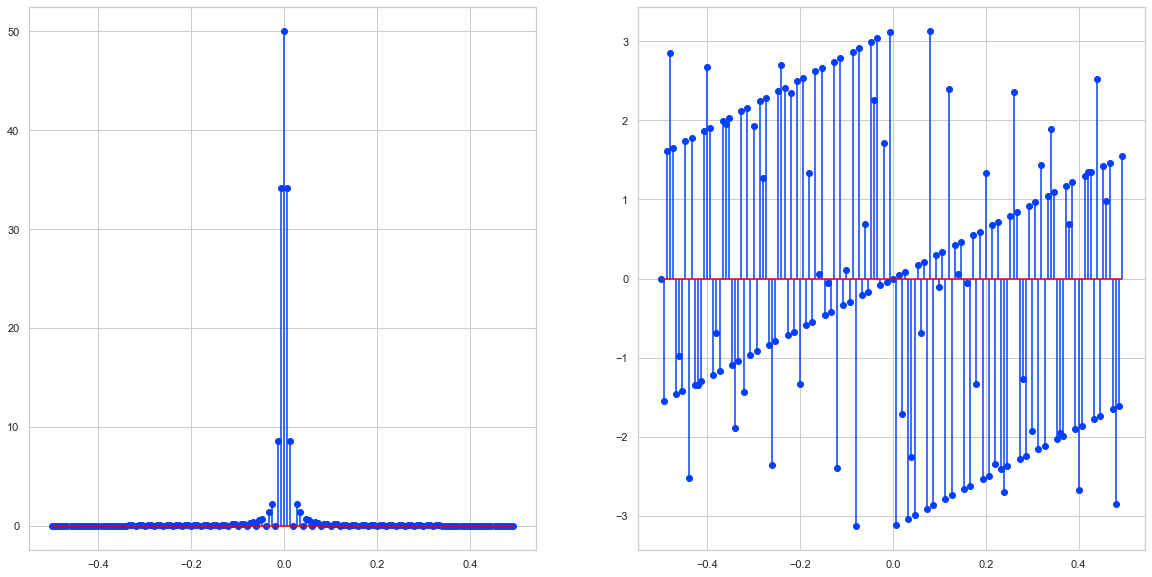

In [43]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

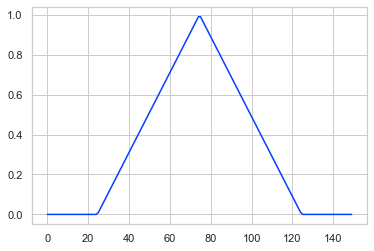

In [18]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [19]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

1.9474017477145486e-15

<StemContainer object of 3 artists>

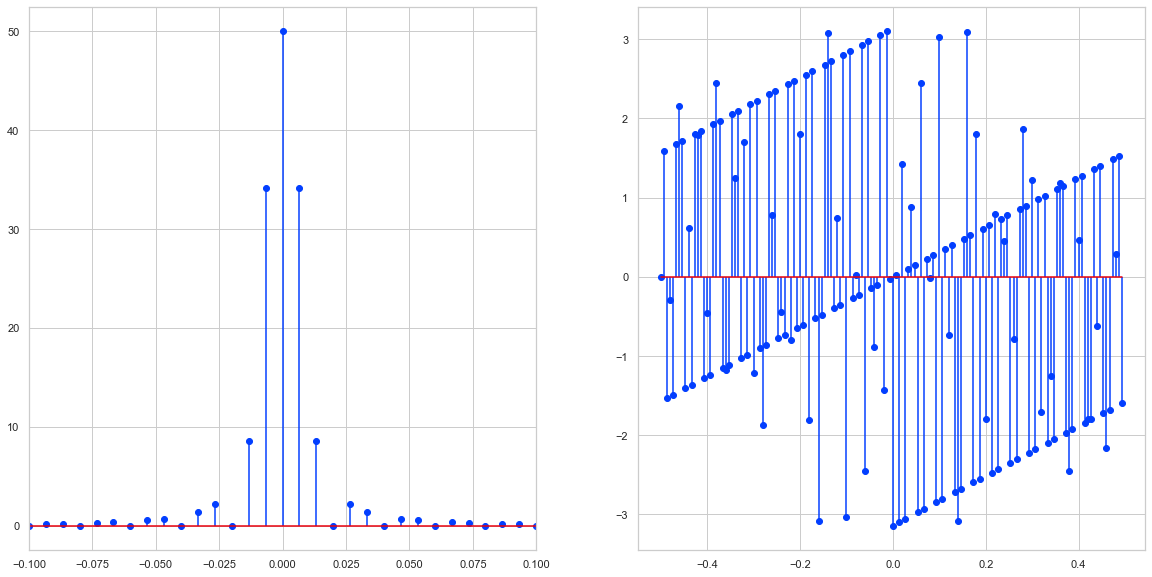

In [20]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

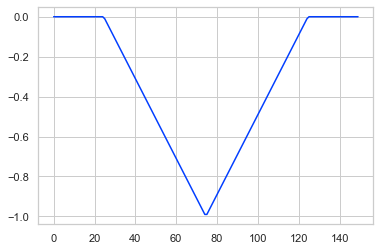

In [21]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [22]:
distance.euclidean(s2,ifft_mag_phase2)

2.1224010932966605e-15

In [23]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  0.0
Phase 0.0870667910377549


In [24]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

1.0


In [25]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

0.7272727272727273


# Cepstrum

In [26]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [27]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[-inf  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


In [28]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[-inf  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


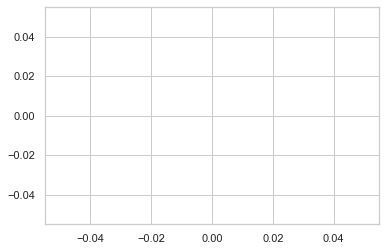

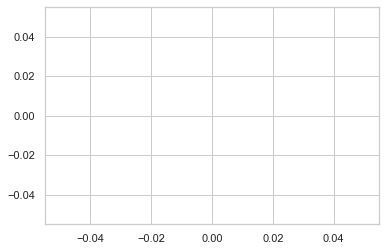

In [29]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [30]:
print(wasserstein_distance(ceps1,ceps2))

nan


In [31]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [48]:
#print(jaccard(cepstrum1,cepstrum2))

## Results

In [37]:
from prettytable import PrettyTable

+-------------+---------------+---------------+--------------------+---------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |       Jaccard       |
+-------------+---------------+---------------+--------------------+---------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 0.6666666666666667 | 0.20634920634920634 |
+-------------+---------------+---------------+--------------------+---------------------+


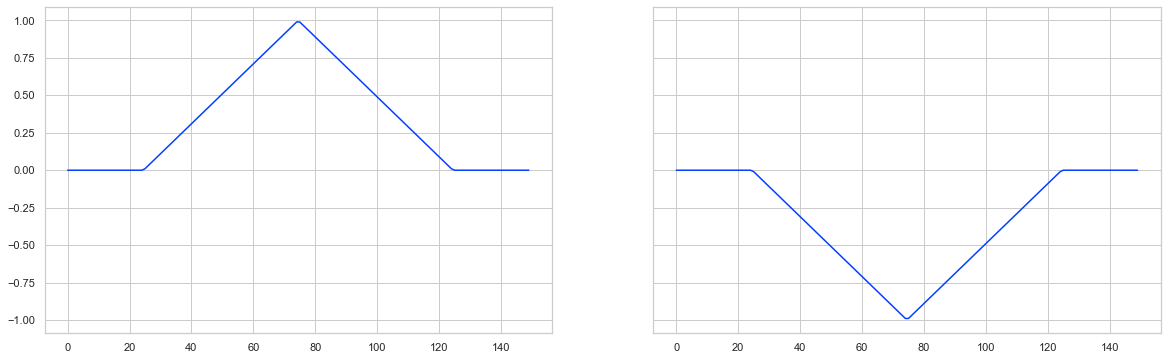

In [38]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+--------------------+---------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         | Jaccard |
+-------------+---------------+---------------+--------------------+---------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 0.6895200907256891 |   0.9   |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 |        0.0         |   1.0   |
+-------------+---------------+---------------+--------------------+---------+


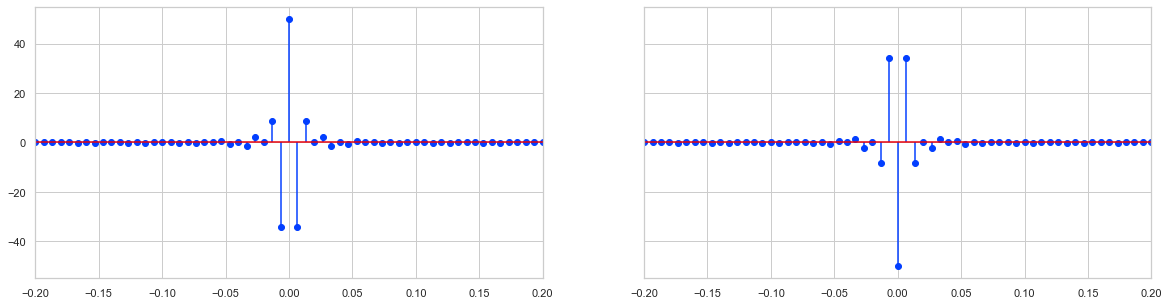

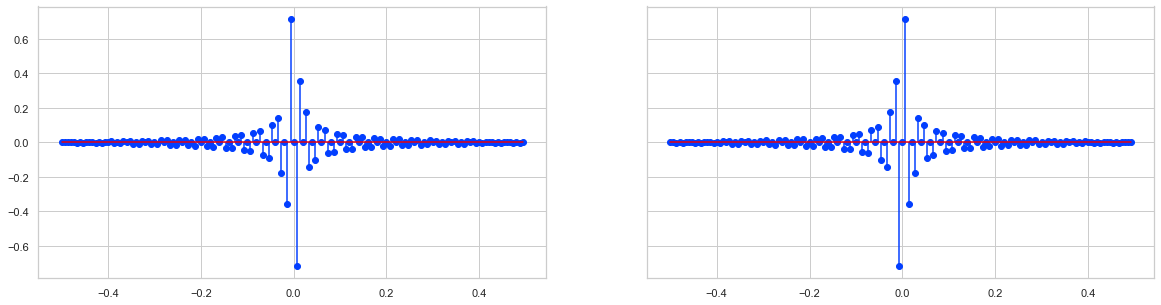

In [49]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[0].set_xlim(-0.2, 0.2)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[1].set_xlim(-0.2, 0.2)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',0.6895200907256891,0.9])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',0.0,1.0])
print(table2)

+-------------+---------------+---------------+--------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |      Jaccard       |
+-------------+---------------+---------------+--------------------+--------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 |        0.0         |        1.0         |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.0870667910377549 | 0.7272727272727273 |
+-------------+---------------+---------------+--------------------+--------------------+


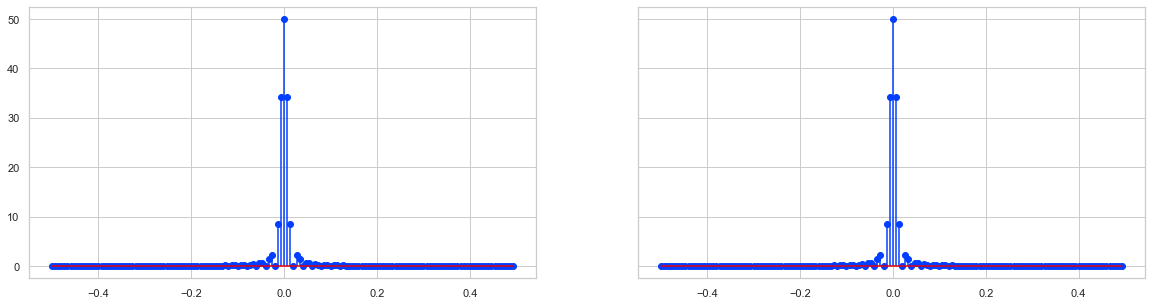

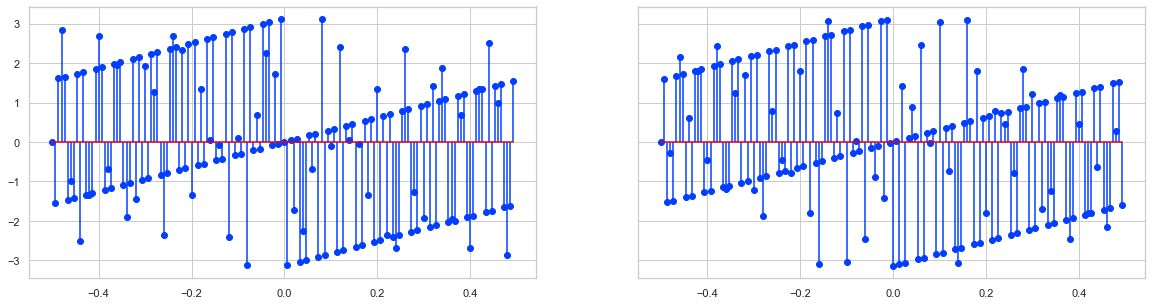

In [50]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',0.0,1.0])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.0870667910377549,0.7272727272727273])
print(table3)

In [51]:
'''fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)'''

"fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)\naxs[0].plot(ceps1)\naxs[1].plot(ceps2)\ntable4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])\ntable4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])\nprint(table4)"